# Exercise 6 - Markov chains and Detailed balance

## Exersice 1 - RMS deviation

In [1]:
import numpy as np
import matplotlib.pylab as plt

def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = np.random.uniform(-1.0, 1.0), np.random.uniform(-1.0, 1.0)
        if(x ** 2 + y ** 2 < 1.0):
            n_hits += 1
    
    return n_hits

n_runs = 500
n_trials = np.logspace(4, 12, num = 9)*2
rms = np.zeros(len(n_trials))
Lista_pi = np.zeros(n_runs)

#Intenté usar n_trials[i] en vez de 2**i pero se demoraba demasiado en correr.

for i in range(len(n_trials)):
    for j in range(n_runs):
         Lista_pi[j] = np.abs((4.0 * direct_pi(2**i) / float(2**i)) - np.pi)*(1/2**i)
    
    rms[i] = np.sum(Lista_pi)

fig0 = plt.figure(figsize=(8,5))
ax0 = fig0.add_subplot(111)
ax0.plot(np.log(n_trials), np.log(rms), 'o', color = 'darkred')
ax0.set_xlabel('$n$_$trials$', size = 15)
ax0.set_ylabel('$RMS$', size = 15)
ax0.set_title('RMS Deviation by Using Direct Sampling of $pi$', size = 18)

plt.show()

<Figure size 800x500 with 1 Axes>

We can say that if in logaritmic scale it shows a semi-straigh line, it should behave like an exponencial decay in normal scale, so it should converge in a number between 1 and 0.

## Exercise 2 - Other way to compute $\pi$ Markov chain

### 1.

In [2]:
CuadradoLado_Max = 10.0
CuadradoLado_Min = -10.0

def CaminataRandomReturn(n_trials, delta):
    
    PositionX_ini = np.random.random()*10 -5
    PositionY_ini = np.random.random()*10 -5
    
    InicialX = PositionX_ini
    InicialY = PositionY_ini
    
    PositionX_old = np.copy(PositionX_ini)
    PositionY_old = np.copy(PositionY_ini)
    
    PositionsX = []
    PositionsY = []
    
    for i in range (n_trials):
        DirectionX = np.random.binomial(1, 0.5, 1)
        DirectionY = np.random.binomial(1, 0.5, 1)
        
        if(DirectionX == 0 and DirectionY == 0):
            PositionX_new = PositionX_old + delta
            PositionY_new = PositionY_old + delta
            
        elif(DirectionX == 1 and DirectionY == 1):
            PositionX_new = PositionX_old - delta
            PositionY_new = PositionY_old - delta
        
        elif(DirectionX == 0 and DirectionY == 1):
            PositionX_new = PositionX_old + delta
            PositionY_new = PositionY_old - delta

        elif(DirectionX == 1 and DirectionY == 0):
            PositionX_new = PositionX_old - delta
            PositionY_new = PositionY_old + delta
        
        if(PositionX_new > CuadradoLado_Max or PositionX_new < CuadradoLado_Min or PositionY_new > CuadradoLado_Max
          or PositionY_new < CuadradoLado_Min):
            
            PositionX_new = InicialX
            PositionY_new = InicialY
        
        PositionX_old = PositionX_new
        PositionY_old = PositionY_new
            
        PositionsX.append(PositionX_old)
        PositionsY.append(PositionY_old)
    
    return (PositionsX, PositionsY)

### 2.

In [3]:
def CaminataRandomStay(n_trials, delta):
    
    PositionX_ini = np.random.random()*10 -5
    PositionY_ini = np.random.random()*10 -5
    
    PositionX_old = np.copy(PositionX_ini)
    PositionY_old = np.copy(PositionY_ini)
    
    PositionsX = []
    PositionsY = []
    
    for i in range (n_trials):
        DirectionX = np.random.binomial(1, 0.5, 1)
        DirectionY = np.random.binomial(1, 0.5, 1)
        
        if(DirectionX == 0 and DirectionY == 0):
            PositionX_new = PositionX_old + delta
            PositionY_new = PositionY_old + delta
            
            PositionX_old = PositionX_new
            PositionY_old = PositionY_new
            
        elif(DirectionX == 1 and DirectionY == 1):
            PositionX_new = PositionX_old - delta
            PositionY_new = PositionY_old - delta
        
        elif(DirectionX == 0 and DirectionY == 1):
            PositionX_new = PositionX_old + delta
            PositionY_new = PositionY_old - delta

        elif(DirectionX == 1 and DirectionY == 0):
            PositionX_new = PositionX_old - delta
            PositionY_new = PositionY_old + delta
        
        if(PositionX_new > CuadradoLado_Max or PositionX_new < CuadradoLado_Min or PositionY_new > CuadradoLado_Max
          or PositionY_new < CuadradoLado_Min):
            
            PositionX_new = PositionsX[i-1]
            PositionY_new = PositionsY[i-1]
            
        PositionX_old = PositionX_new
        PositionY_old = PositionY_new
            
        PositionsX.append(PositionX_old)
        PositionsY.append(PositionY_old)
    
    return (PositionsX, PositionsY)

### 3.

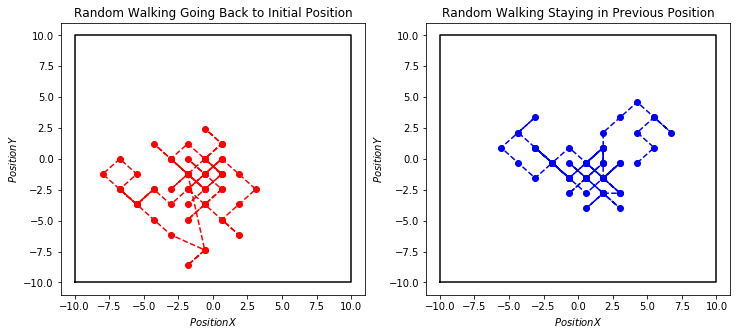

In [4]:
fig1 = plt.figure(figsize = (12,5))

delt1 = np.random.random()*4

ax0 = fig1.add_subplot(121)
ax0.plot(CaminataRandomReturn(2**6, delt1)[0], CaminataRandomReturn(2**6, delt1)[1], 'or--' )
ax0.plot([-10, -10, 10, 10, -10], [-10, 10, 10, -10, -10], c = 'black')
ax0.set_xlabel('$Position X$')
ax0.set_ylabel('$Position Y$')
ax0.set_title('Random Walking Going Back to Initial Position')

ax1 = fig1.add_subplot(122)
ax1.plot(CaminataRandomStay(2**6, delt1)[0], CaminataRandomStay(2**6, delt1)[1], 'ob--' )
ax1.plot([-10, -10, 10, 10, -10], [-10, 10, 10, -10, -10], c = 'black')
ax1.set_xlabel('$Position X$')
ax1.set_ylabel('$Position Y$')
ax1.set_title('Random Walking Staying in Previous Position')

plt.show()

The main difference between the methods is that in a stadistic way like a average position or trying to find $\pi$ with th

### 4.

In [ ]:
def piRandomWalking(N, delt0):
    n_hits = 0
    PosX, PosY = CaminataRandomReturn(N, delt0)[0], CaminataRandomReturn(N, delt0)[1]
    x, y = PosX, PosY 
    for i in range(N):
        if(x[i] ** 2 + y[i] ** 2 < 400):
            n_hits += 1
    
    return n_hits

difDeltas = np.array([0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0])

def RMS(deltas):
    for i in range(len(n_trials)):
        for j in range(n_runs):
             Lista_pi[j] = np.abs((4.0 * piRandomWalking(2**i, deltas) / float(2**i)) - np.pi)*(1/2**i)
    
        rms[i] = np.sum(Lista_pi)
    return rms

RMS0 = RMS(difDeltas[0])
RMS1 = RMS(difDeltas[1])
RMS2 = RMS(difDeltas[2])
RMS3 = RMS(difDeltas[3])
RMS4 = RMS(difDeltas[4])
RMS5 = RMS(difDeltas[5])
RMS6 = RMS(difDeltas[6])


fig2 = plt.figure(figsize = (12,5))
ax0 = fig2.add_subplot(111)
ax0.plot(RMS0, n_trials)
ax0.plot(RMS1, n_trials)
ax0.plot(RMS2, n_trials)
ax0.plot(RMS3, n_trials)
ax0.plot(RMS4, n_trials)
ax0.plot(RMS5, n_trials)
ax0.plot(RMS6, n_trials)